<a href="https://colab.research.google.com/github/Charan619/Digit-Recognition/blob/master/Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing TensorFlow

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
#print('Using TensorFlow version', tf.__version__)

### Importing MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [3]:
print( 'x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plotting an Image Example

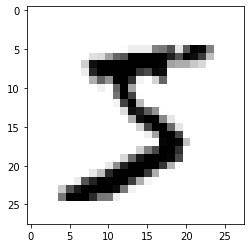

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

### Displaying Labels

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Display Encoded Labels

In [8]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Unrolling N-dimensional Arrays to Vectors

In [9]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

### Data Normalization

In [10]:
#making pixel data around 0 value
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


### Reshaping Pixel Values to 28x28x1 matrix

In [11]:
x_train_norm = x_train_norm.reshape(-1,28,28,1)
x_test_norm = x_test_norm.reshape(-1,28,28,1)

### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,BatchNormalization, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
 
# Using bigger kernels as information is distributed globally in the image and not locally

model.add(Conv2D(20, (7, 7), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(10, (5, 5), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#model = Sequential([
#    Dense(128,activation='relu',input_shape=(784,)),
 #   Dense(128,activation='relu'),
  #  Dense(10,activation='softmax')
#])


### Compiling the Model

In [16]:
from keras.optimizers import SGD,Adam
sgd = SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        1000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        5010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 10)        40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 10)         

### Training the Model

In [17]:
model.fit(x_train_norm,y_train_encoded,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 89s 47ms/step - loss: 0.6855 - accuracy: 0.8033
Epoch 2/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1110 - accuracy: 0.9662
Epoch 3/20
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0841 - accuracy: 0.9738
Epoch 4/20
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0766 - accuracy: 0.9755
Epoch 5/20
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0687 - accuracy: 0.9789
Epoch 6/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0597 - accuracy: 0.9806
Epoch 7/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0589 - accuracy: 0.9820
Epoch 8/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0588 - accuracy: 0.9816
Epoch 9/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 10/20
1875/1875 [==============================] - 91s 48m

### Evaluating the Model

In [18]:
_,accuracy= model.evaluate(x_test_norm,y_test_encoded,verbose=2)
print('Accuracy: ',accuracy * 100)

313/313 - 4s - loss: 0.0197 - accuracy: 0.9938
Accuracy:  99.37999844551086


### Predictions on Test Set

shape of preds:  (10000, 10)


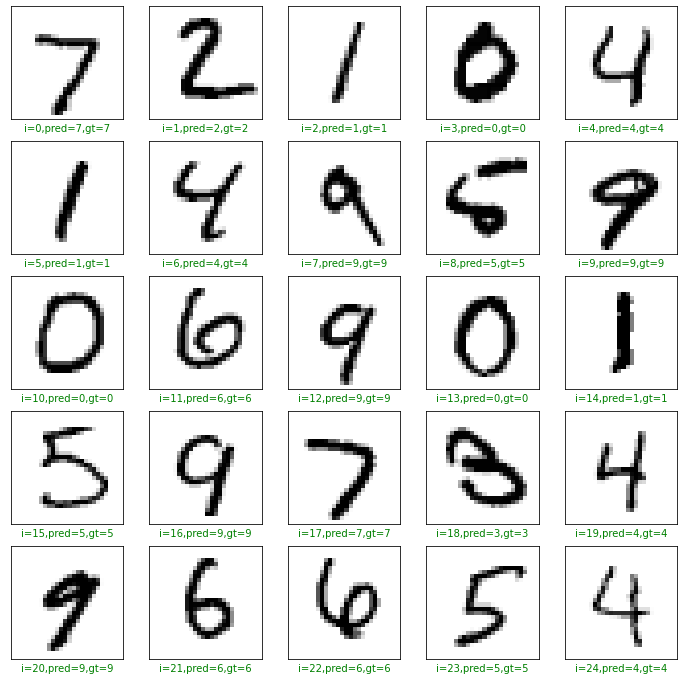

In [19]:
preds=model.predict(x_test_norm)
print('shape of preds: ',preds.shape)

plt.figure(figsize=(12,12))

start_index=0

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={},pred={},gt={}' .format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
        
plt.show()